We'll see how to **read from** and **write to files**.

## Manual open and close

The main way to read files is to use the built-in function `open()`:

In [20]:
names_file = open("names.txt")
names_file

<_io.TextIOWrapper name='names.txt' mode='r' encoding='UTF-8'>

This function returns a **file handler object** (or technically an `io.TextIOWrapper`). With this function, Python open the file and gives us the control of that through this `names_file` variable. Since this is the manual way of opening a file, you'll always want to make sure that you close the file out when you're done with it with `close()` method:

In [4]:
names_file.close()

This closing function effectively writes changes to the file and Python then releases control of the file.

There are a number of different things that you can do with this file handler object and a few properties we can access as well.

We can access the name of the file itself:

In [6]:
names_file = open("names.txt")
print(names_file.name)
names_file.close()

names.txt


There are a few of main ways to get the contents of a file once you have this file handler object.

The first is going to be the `read()` method. This function can take a single argument that represents the size as an `int`. For an ASCII file like this, the size will be the number of characters you want it to read; if you don't pass any specific size, then it will read everything at once:

In [13]:
names_file = open("names.txt")
all_names = names_file.read()
print(all_names)

Jake
Amanda
Kiara
Vanellope
Cayde
Hunter
Horus


In [14]:
all_names

'Jake\nAmanda\nKiara\nVanellope\nCayde\nHunter\nHorus'

Note that I need to use the `print()` statement because, if I ran only `all_names` in a cell of this Jupyter Notebook, I would get a result like: `'Jake\nAmanda\nKiara\nVanellope\nCayde\nHunter\nHorus'`. That's becuase `print(all_names)` correctly interprets the newline characters (\n) and prints the names line by line.

There another thing to point out when you read a file manually like this and the effect of calling `read()`, which we'll demonstrate now.

The difference between `read()` and `readline()` is that `readline()` will go to the end of a particular line. So, while you many not see it in the file, there's actually a **new line character** (`\n`) at the end of each line. Python looks for that new line character to determine when a line should end. So, `readline()` is going to read until it find the end of the line or the new line charater and then stop:

In [18]:
print("Reading more lines...")
print(names_file.readline())
print(names_file.readline())
print(names_file.readline())

Reading more lines...





As we can see, we have three blank lines and that' because when you read something in a file, Python keeps track of your position and so, when we've read everything with no size specified, Python read the entire file. So, after the `read()` function, Python is at the end of the file and that's the reason why we got two blank lines.

There's another attribute from files you can check just to make sure you've everything cleaned up, and that's a check to see if the file is closed:

In [19]:
names_file = open("names.txt")
all_names = names_file.read()
print(all_names)
print("Reading more lines...")
print(names_file.readline())
print(names_file.readline())
print(names_file.readline())
names_file.close()
print(f"File closed? {names_file.closed}")

Jake
Amanda
Kiara
Vanellope
Cayde
Hunter
Horus
Reading more lines...



File closed? True


## Read all lines into a list

If you don't like having everything jumbled into a single string with the new line characters in place, you can use another method of that file handler. Let's use the same serup as we did before:

In [23]:
names_file = open("names.txt")
all_names = names_file.readlines()

The `readlines()` method returns a list and the new line character is the separator separates the elements of this list. Let's print the result in different ways:

In [25]:
print("Printing all together")
print(f"{all_names=}")

print("Printing out one at a time")
for name in all_names:
    print(name)

Printing all together
all_names=['Jake\n', 'Amanda\n', 'Kiara\n', 'Vanellope\n', 'Cayde\n', 'Hunter\n', 'Horus']
Printing out one at a time
Jake

Amanda

Kiara

Vanellope

Cayde

Hunter

Horus


* `all_names` is a list as expected;
* why are we getting the extra new line in the for loop printing? That's becuase we have a new line character at the end of each element of the list so, while it splits on the new line, it does include that new line at the end of each element. Another thing is that the `print` statement, by default, ends with a new line characters. Luckily this is a behaviour that we can change:

In [26]:
print("Printing out one at a time")
for name in all_names:
    print(name, end="")

Printing out one at a time
Jake
Amanda
Kiara
Vanellope
Cayde
Hunter
Horus

With `end=""`, we are telling that, instead of put a new line at the end, put nothing at the end because we already have a new line.

## Context Manager

There's an alternative to open and close the file manually every single time. We can do that by using a **Context Manager**:

In [30]:
with open("names.txt") as name_file:
    print("Reading three names:")
    print(name_file.readline(), end="")
    print(name_file.readline(), end="")
    print(name_file.readline(), end="")
# out of scope

Reading three names:
Jake
Amanda
Kiara


When you see `with` and `as` in Python, that means you are working with what's knonwn as a **Context Manager**. A Context Manager handles some kind of process and gives you back an object as a result and, while you are inside the scope of this context manager, you can do things with that particular object and then when you exit the scope of that coontext manager, the context manager will do some type of step to clean that up.

This is the **recommended way of dealing with files in Python**.

Let's see another detail. Let's run either code with context manager and the previous method with for loop consecutively:

In [31]:
names_file = open("names.txt")
all_names = names_file.readlines()
print("Printing out one at a time")
for name in all_names:
    print(name, end="")
name_file.close()
with open("names.txt") as name_file:
    print("Reading three names:")
    print(name_file.readline(), end="")
    print(name_file.readline(), end="")
    print(name_file.readline(), end="")

Printing out one at a time
Jake
Amanda
Kiara
Vanellope
Cayde
Hunter
HorusReading three names:
Jake
Amanda
Kiara


We can see that there is no separation between `Horus` and `Reading three names:` strings: that's becuase in the file there is no new line character after `Horus` because the file ends at the `s` character. If we added a new line in the `names.txt` file, we would solve the problem.

## Iterate line by line

Actually we don't have to manually call `readline()` function for each line that we want to go through. In fact, we could say:

In [32]:
with open("names.txt") as names_file:
    print("Reading all names")
    for name in names_file:
        print(name, end="")

Reading all names
Jake
Amanda
Kiara
Vanellope
Cayde
Hunter
Horus

With the statement `for name in names_file:` we actually are saying "for line in names_file" until the endo of the file, so we are basically iterating through each line.

Without the (useless) print statement `print("Reading all names")`, this would take just three lines of code and furthermore it's incredibly memory efficient because it doesn't load the contents of the file all at once like we did with `read()` function. It's just going line by line (or new line character by new line character).

## Write to files

Aside from just reading from a file, we have a few other modes avaiable to us. We use `r` for reading (it's the default value so can omit it), `w` for writing, `a` for appending (meaning instead of starting at the beginning of the file, Python will go to the end of the file). Furthermore we can use a `+` after `r` to both read and write to files. Let's do that:

In [33]:
with open("names.txt", "r") as names_file:
    print("Reading all names")
    for name in names_file:
        print(name, end="")

Reading all names
Jake
Amanda
Kiara
Vanellope
Cayde
Hunter
Horus

Now let's use `w` mode, but pay attention: when you use `w` mode and the file specified in the name already exists, it's going to erase the contents of that file.

In [35]:
with open("new_file.txt", "w") as nf: # now nf becomes our file handler object
    nf.write("these lines ")
    nf.write("are not separated")
    nf.write("\nuse newlines to separate\n")

Let's make a screenshot of content of this new file:

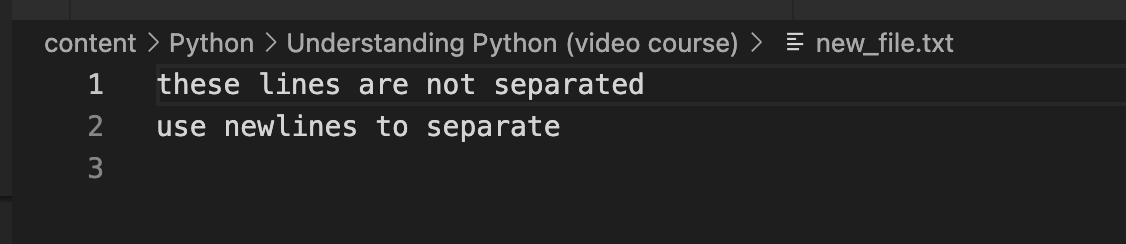

We can see that, even though we specified two different `write()` statement for `these lines` and `are not separated`, they actually are on the same line because we're not actually writing new line characters to those lines. We did it for the third `write()` statement and, indeed, a new line is created.

We can also use the `writelines()` function. With this function we'll write more than one string, meaning that this function expects an iterable like a list and the contents of the iterable should be strings and what we'll do is we'll go through the iterable and write each of the values to the file. Let's demonstrate it:

In [38]:
with open("new_file.txt", "w") as nf: # now nf becomes our file handler object
    nf.write("these lines ")
    nf.write("are not separated")
    nf.write("\nuse newlines to separate\n")
    nf.write("writelines will write more than one string:\n")
    nf.writelines(map(str, range(5))) # we need strings so we use map function
    nf.write("\nyou still need newline characters:\n")
    nf.writelines(map(lambda s: f"{s}\n", range(6)))

Here's the result in the file:

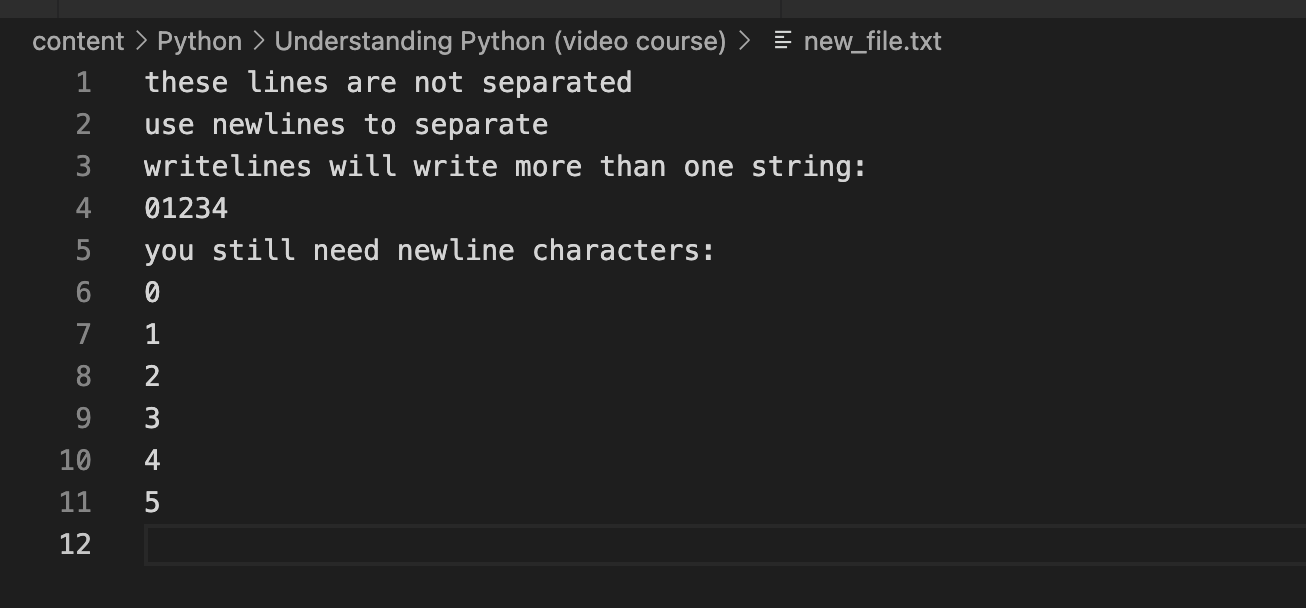

## Append mode

If you don't want to overwrite the content of the file you can use the `a` mode where Python starts writing at the end of the file:

In [39]:
with open("new_file.txt", "a") as nf: # now nf becomes our file handler object
    nf.write("these lines ")
    nf.write("are not separated")
    nf.write("\nuse newlines to separate\n")
    nf.write("writelines will write more than one string:\n")
    nf.writelines(map(str, range(5))) # we need strings so we use map function
    nf.write("\nyou still need newline characters:\n")
    nf.writelines(map(lambda s: f"{s}\n", range(6)))

Here's the result:

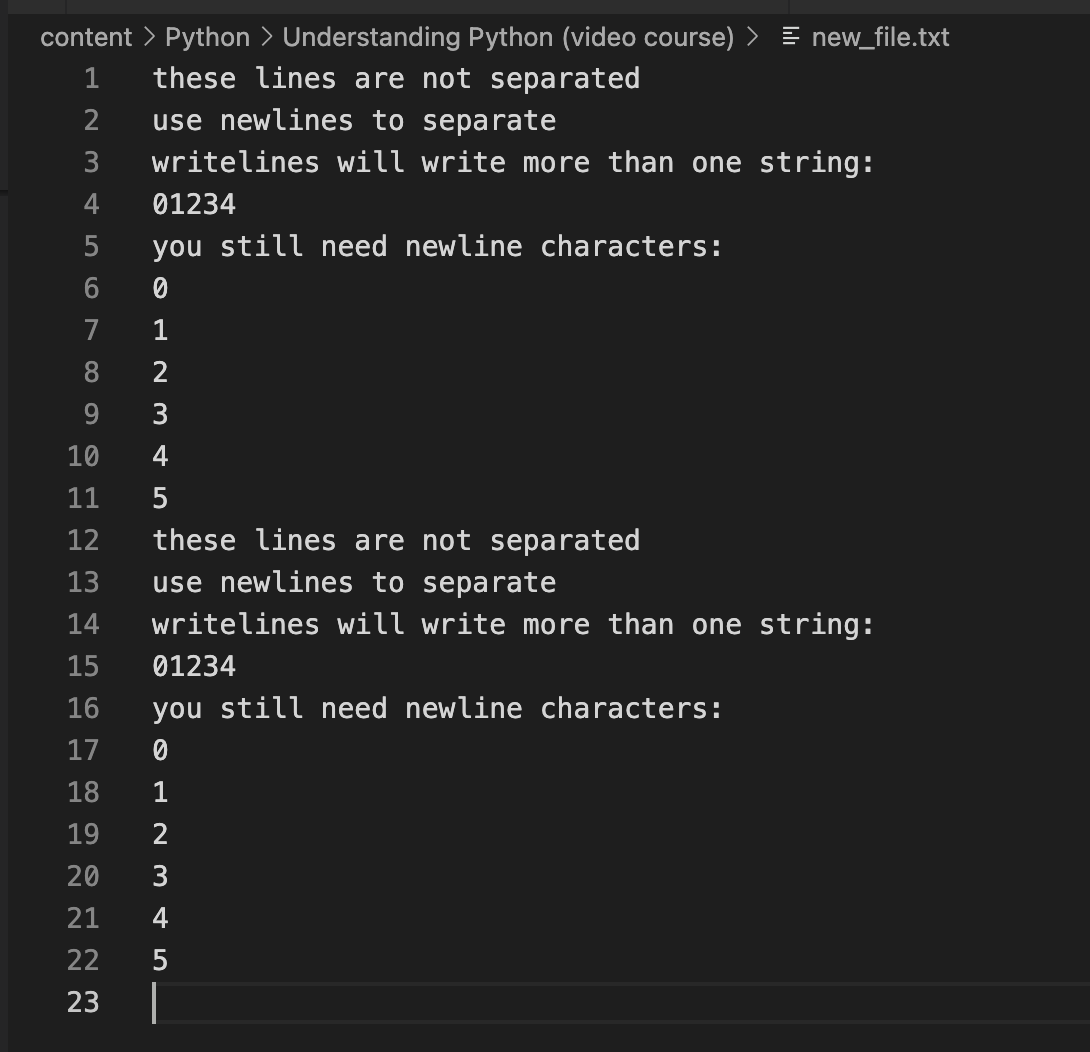
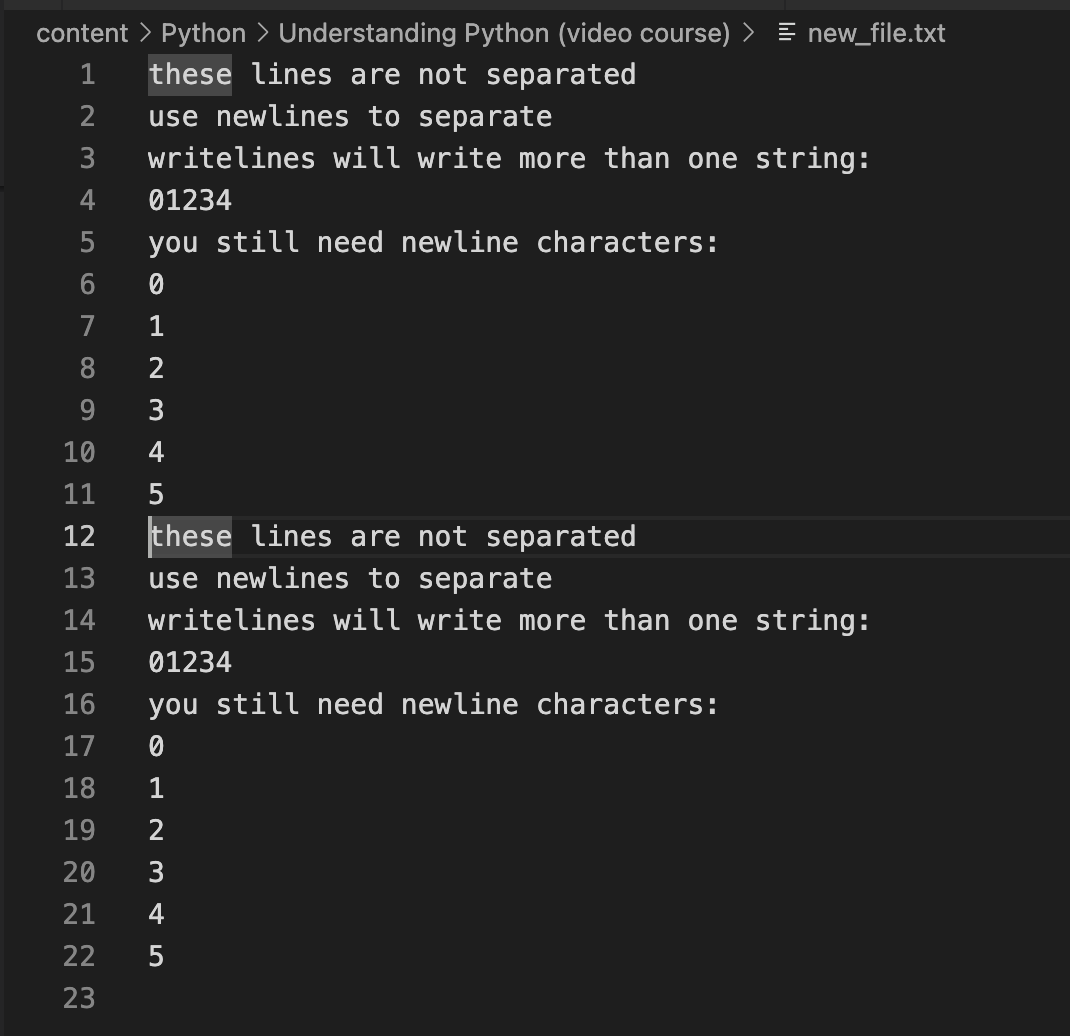

## Working with binary files

Until now all files have been opened in what's called "text mode", meaning that we read and write strings from end to the files, but there's another mode we can use that is **binary mode**. To do that we add `b` to the `mode` where data will be read and written in the form of bytes object. This is the mode you should use for all files that don't contain text or shouldn't be interpreted as text. Let's give an example:

In [40]:
with open("binary_file", "wb") as binary_file: # w for writing mode, b for bynary mode (or "rb" or "ab")
    binary_file.write(b"0123456789") # with "b" we are telling Python that this should be a bytes type string

Here's the result:

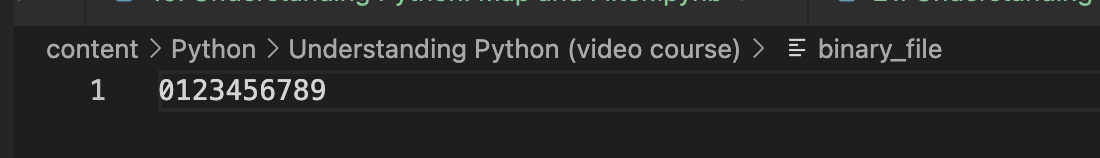

We can als store in the `bytes_written` variable how many bytes are written:

In [92]:
with open("binary_file", "wb") as binary_file:
    binary_file.write(b"0123456789")
    bytes_written = binary_file.write(b"qwertyuiop")
    print(f"We wrote {bytes_written} bytes to {binary_file.name}")

We wrote 10 bytes to binary_file


Now, let's make some operations:

In [93]:
f = open("binary_file", "rb+")

In [94]:
f.read(5)

b'01234'

Remember that Python remember the position is at. To retrieve this position we can run:

In [95]:
f.tell()

5

Let's go ahead in the file and look again at the position:

In [96]:
f.read(5)

b'56789'

In [97]:
f.tell()

10

We can also jump ahead with `seek()` method and then we'll read the character at that position:

In [98]:
f.seek(15)

15

In [99]:
f.read(1)

b'y'

Let's see that after reading one character the stream reading is went ahead of 1 position:

In [100]:
f.tell()

16

We can also jump backwords using a negative integer. Notice that the second argument is `1` because `1` stands for our current position. There's three possible value for the scond argument:
* `0`: represents the default and it references the beginning of the file
* `1`: represents the current position within the file
* `2`: represents the end of the file

In [101]:
f.seek(-5, 1)

11

In [102]:
f.read(1)

b'w'

Let's go backwords for 5 positions starting from the end of the file:

In [103]:
f.seek(-5, 2)

15

This makes sense since our file is 20 bytes long.

In [104]:
f.read(1)

b'y'

Additionally, we can also write to that file:

In [105]:
f.write(b"jake")

4

However, nothing changes in the file because that doesn't change until that file is closed or flushed. Let's close it:

In [106]:
f.close()

Actually, we can also use `flush()` method to apply all the changes that we've made so far without closing the file:

In [107]:
f = open("binary_file", "rb+")
f.seek(-3, 2)
f.write(b"jake")
f.flush()

In [108]:
f.closed

False

Then let's close the file and let's confirm it:

In [109]:
f.close()

In [110]:
f.closed

True